Dataset : Titanic Dataset
Evaluating Logistic Regression with Cross-Validation
Exercise: Implement logistic regression and evaluate the model using k-fold cross-validation.
Compare the cross-validation scores with a single train-test split evaluation.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

titanic = pd.read_csv('titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

logreg = LogisticRegression(max_iter=200)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(logreg, X, y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
single_split_score = accuracy_score(y_test, y_pred)
print("Single train-test split score:", single_split_score)


Cross-validation scores: [0.81005587 0.79775281 0.84269663 0.7752809  0.78089888]
Mean cross-validation score: 0.8013370158809867
Single train-test split score: 0.8100558659217877


Analyzing Overfitting and Underfitting in Decision Trees
Exercise: Train a decision tree classifier with varying depths to analyze overfitting and underfitting. 
Plot training and validation accuracies to visualize the effects.

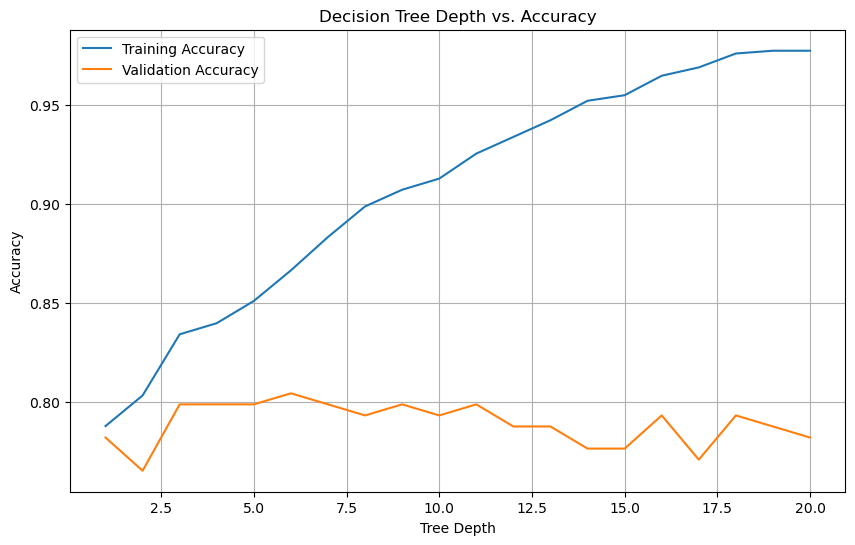

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

titanic = pd.read_csv('titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_accuracies = []
val_accuracies = []

depths = range(1, 21)
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    y_train_pred = tree.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)
]
    y_val_pred = tree.predict(X_test)
    val_acc = accuracy_score(y_test, y_val_pred)
    val_accuracies.append(val_acc)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, val_accuracies, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Calculating Precision, Recall, and F1-Score for Logistic Regression
Exercise: Implement logistic regression and calculate precision, recall, and F1-score for the model. 
Tip: Discuss how these metrics provide insights into model performance in  your week article.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

titanic = pd.read_csv('titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=200)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888


ROC Curve Analysis for Decision Trees
Exercise: Implement a decision tree classifier and plot the ROC curve.
Compute the AUC (Area Under the Curve) and interpret the results.


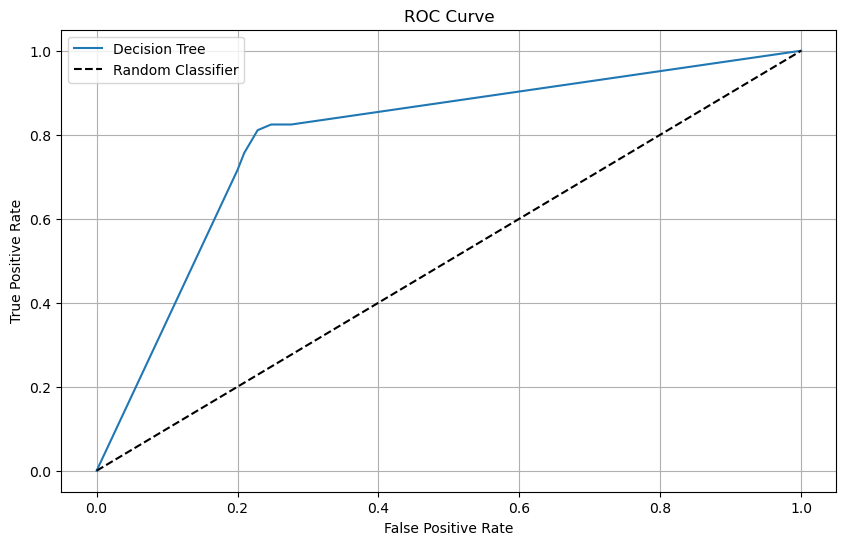

AUC: 0.7929214929214929


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

y_prob = tree.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)


Comparing Model Performance with and without Cross-Validation
Exercise: Train logistic regression and decision tree models with and without cross-validation. 
Compare their performance metrics, including accuracy, precision, and recall.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

titanic = pd.read_csv('titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)

print("Logistic Regression without Cross-Validation")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)

# Decision Tree without Cross-Validation
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)

print("\nDecision Tree without Cross-Validation")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)

# Logistic Regression with Cross-Validation
cv_logreg = LogisticRegression(max_iter=200)
y_pred_cv_logreg = cross_val_predict(cv_logreg, X, y, cv=5)

accuracy_cv_logreg = accuracy_score(y, y_pred_cv_logreg)
precision_cv_logreg = precision_score(y, y_pred_cv_logreg)
recall_cv_logreg = recall_score(y, y_pred_cv_logreg)

print("\nLogistic Regression with Cross-Validation")
print("Accuracy:", accuracy_cv_logreg)
print("Precision:", precision_cv_logreg)
print("Recall:", recall_cv_logreg)

# Decision Tree with Cross-Validation
cv_tree = DecisionTreeClassifier(random_state=42)
y_pred_cv_tree = cross_val_predict(cv_tree, X, y, cv=5)

accuracy_cv_tree = accuracy_score(y, y_pred_cv_tree)
precision_cv_tree = precision_score(y, y_pred_cv_tree)
recall_cv_tree = recall_score(y, y_pred_cv_tree)

print("\nDecision Tree with Cross-Validation")
print("Accuracy:", accuracy_cv_tree)
print("Precision:", precision_cv_tree)
print("Recall:", recall_cv_tree)


Logistic Regression without Cross-Validation
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432

Decision Tree without Cross-Validation
Accuracy: 0.776536312849162
Precision: 0.717948717948718
Recall: 0.7567567567567568

Logistic Regression with Cross-Validation
Accuracy: 0.7856341189674523
Precision: 0.7337461300309598
Recall: 0.6929824561403509

Decision Tree with Cross-Validation
Accuracy: 0.7845117845117845
Precision: 0.7259036144578314
Recall: 0.7046783625730995
